In [4]:
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
import os

import matplotlib.pyplot as plt
import numpy as np
import openai

In [6]:
openai = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))


def get_embedding(text):
    return openai.embeddings.create(input=text, model="text-embedding-3-small").data[0].embedding


len(get_embedding("Hello, world!"))

1536

In [7]:
# Original vectors
a = np.array(get_embedding("I am Happy!"))
b = np.array(get_embedding("I am Sad!"))

print(np.dot(a, b))

# Step 1: Normalize a
q1 = a / np.linalg.norm(a)

# Step 2: Orthogonalize b against q1
proj_b_q1 = np.dot(q1, b) * q1
u2 = b - proj_b_q1

# Step 3: Normalize u2
q2 = u2 / np.linalg.norm(u2)

print("q1:", q1)
print("q2:", q2)

# Check orthogonality (should be close to 0)
print("Dot product (q1, q2):", np.dot(q1, q2))

0.5999896705009601
q1: [ 0.0051733  -0.04146346 -0.0509885  ...  0.00845315  0.00648268
  0.01980747]
q2: [ 0.00040794  0.00216099 -0.02947283 ...  0.00850242  0.00193413
 -0.0217786 ]
Dot product (q1, q2): -2.740863092043355e-16


In [8]:
import math


def normalize(v):
    # Compute the length (norm) of the vector
    norm = math.sqrt(sum(x**2 for x in v))

    # Check for zero vector to avoid division by zero
    if norm == 0:
        raise ValueError("Cannot normalize a zero vector")

    # Divide each component by the norm
    return [x / norm for x in v]


# Example usage:
v = [1, 2, 3]
normalized_v = normalize(v)
print("Normalized vector:", normalized_v)

Normalized vector: [0.2672612419124244, 0.5345224838248488, 0.8017837257372732]


In [35]:
def norm(v: list[float]) -> float:
    return math.sqrt(sum(v[i] ** 2 for i in range(len(v))))


def dot_product(v: list[float], u: list[float]) -> float:
    # also known as the scalar product
    # the dot product of two vectors is the sum of the products of their corresponding components
    # v = [v1, v2, v3]
    # u = [u1, u2, u3]
    # dot product = v1 * u1 + v2 * u2 + v3 * u3
    return sum(v[i] * u[i] for i in range(len(v)))


def projection(v: list[float], u: list[float]) -> list[float]:
    return [dot_product(v, u) / (norm(u) ** 2) * u[i] for i in range(len(u))]


def subtract(v: list[float], u: list[float]) -> list[float]:
    return [v[i] - u[i] for i in range(len(v))]


def multiply(v: list[list[float]], u: list[list[float]]) -> list[list[float]]:
    # Check if matrices can be multiplied
    if len(v[0]) != len(u):
        raise ValueError("Matrix dimensions do not match for multiplication")

    # Get dimensions
    m = len(v)  # rows of first matrix
    n = len(u[0])  # columns of second matrix
    p = len(u)  # rows of second matrix

    # Initialize result matrix with zeros
    result = [[0 for _ in range(n)] for _ in range(m)]

    # Perform matrix multiplication
    for i in range(m):
        for j in range(n):
            for k in range(p):
                result[i][j] += v[i][k] * u[k][j]

    return result


def add(v: list[float], u: list[float]) -> list[float]:
    return [v[i] + u[i] for i in range(len(v))]


def transpose(v: list[float]) -> list[float]:
    # Check if input is empty
    if not v:
        return []

    # Check if input is a matrix (list of lists)
    if not isinstance(v[0], list):
        return v

    # Get dimensions
    rows = len(v)
    cols = len(v[0])

    # Create transposed matrix
    return [[v[j][i] for j in range(rows)] for i in range(cols)]

25
[0.6, 0.8]
1.0
5.0


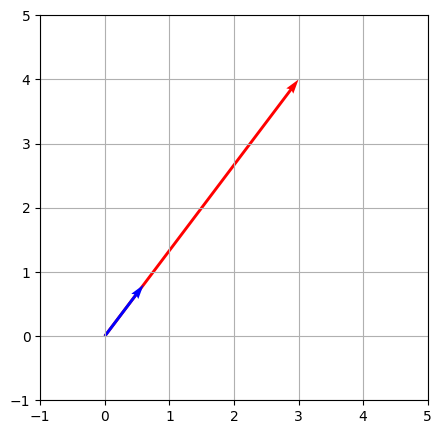

In [10]:
# Normalization process
# goal is to make the vector have a length of 1

v = [3, 4]

print(dot_product(v, v))

normalized_v = normalize(v)
print(normalized_v)
print(norm(normalized_v))

print(dot_product(v, normalized_v))

plt.figure(figsize=(5, 5))
plt.quiver(0, 0, v[0], v[1], color="red", scale_units="xy", angles="xy", scale=1)
plt.quiver(
    0,
    0,
    normalized_v[0],
    normalized_v[1],
    color="blue",
    scale_units="xy",
    angles="xy",
    scale=1,
)
plt.autoscale(False)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.show()

In [11]:
dot_product(v, normalized_v), norm(v), norm(normalized_v)

(5.0, 5.0, 1.0)

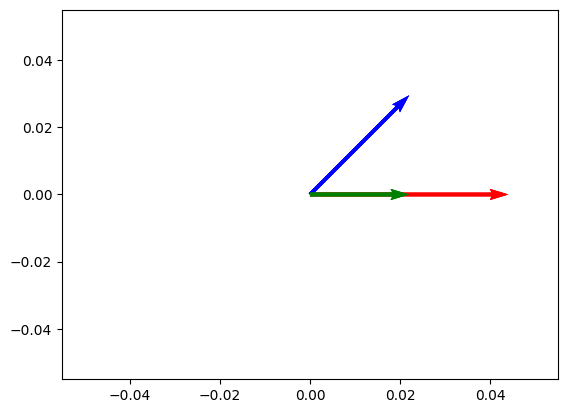

In [12]:
# projection process
# goal is to project one vector onto another

v = [2, 0]
u = [1, 1]

normalized_v = normalize(v)

origin = np.array([[0, 0, 0], [0, 0, 0]])  # origin point
plt.quiver(*origin, v[0], v[1], scale=5, color="red")
plt.quiver(*origin, u[0], u[1], scale=5, color="blue")
plt.quiver(*origin, normalized_v[0], normalized_v[1], scale=5, color="green")
plt.show()

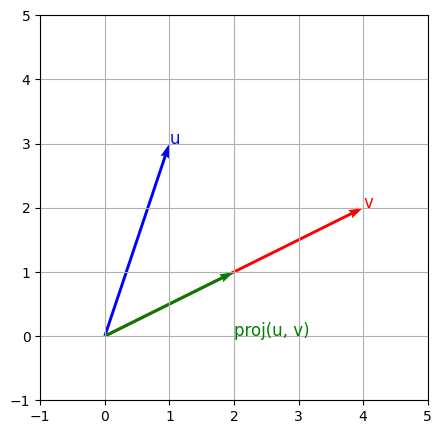

In [13]:
u = [1, 3]
v = [4, 2]
v_u = projection(u, v)

plt.figure(figsize=(5, 5))
plt.quiver(0, 0, v[0], v[1], color="red", scale_units="xy", angles="xy", scale=1)
plt.quiver(0, 0, u[0], u[1], color="blue", scale_units="xy", angles="xy", scale=1)
plt.quiver(0, 0, v_u[0], v_u[1], color="green", scale_units="xy", angles="xy", scale=1)

# labels
plt.text(v[0], v[1], "v", fontsize=12, color="red")
plt.text(u[0], u[1], "u", fontsize=12, color="blue")
plt.text(v_u[0], v_u[1] - 1, "proj(u, v)", fontsize=12, color="green")
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.show()

In [14]:
u = [1, 3]
v = [4, 2]
v_u = projection(u, v)
print(v_u)

[1.9999999999999996, 0.9999999999999998]


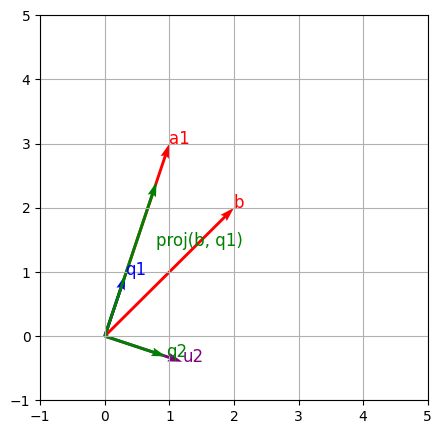

In [16]:
m = [[1, 3], [2, 2]]

a1 = m[0]

# q1 is the normalized vector of a1
q1 = normalize(a1)

b = m[1]

# compute the projection of b onto q1
proj_b_q1 = projection(b, q1)
u2 = subtract(b, proj_b_q1)

q2 = normalize(u2)


plt.figure(figsize=(5, 5))
plt.quiver(0, 0, a1[0], a1[1], color="red", scale_units="xy", angles="xy", scale=1)
plt.text(a1[0], a1[1], "a1", fontsize=12, color="red")

plt.quiver(0, 0, q1[0], q1[1], color="blue", scale_units="xy", angles="xy", scale=1)
plt.text(q1[0], q1[1], "q1", fontsize=12, color="blue")

plt.quiver(0, 0, b[0], b[1], color="red", scale_units="xy", angles="xy", scale=1)
plt.text(b[0], b[1], "b", fontsize=12, color="red")

plt.quiver(
    0,
    0,
    proj_b_q1[0],
    proj_b_q1[1],
    color="green",
    scale_units="xy",
    angles="xy",
    scale=1,
)
plt.text(proj_b_q1[0], proj_b_q1[1] - 1, "proj(b, q1)", fontsize=12, color="green")

plt.quiver(0, 0, u2[0], u2[1], color="purple", scale_units="xy", angles="xy", scale=1)
plt.text(u2[0], u2[1], "u2", fontsize=12, color="purple")

plt.quiver(0, 0, q2[0], q2[1], color="green", scale_units="xy", angles="xy", scale=1)
plt.text(q2[0], q2[1], "q2", fontsize=12, color="green")

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.show()

In [17]:
def qr_decompose(mat: list[list[float]]):
    # Get the number of rows and columns
    m = len(mat)
    n = len(mat[0])

    # Initialize Q and R matrices
    Q = [[0.0 for _ in range(n)] for _ in range(m)]
    R = [[0.0 for _ in range(n)] for _ in range(n)]

    # Helper to get column k from matrix
    def get_col(matrix, k):
        return [row[k] for row in matrix]

    for k in range(n):
        # Start with the current column of mat
        u = get_col(mat, k)

        # Subtract projections onto previous q vectors
        for j in range(k):
            q_j = get_col(Q, j)
            R[j][k] = dot_product(q_j, get_col(mat, k))
            u = subtract(u, [R[j][k] * q_val for q_val in q_j])

        # Compute the norm and normalize
        R[k][k] = norm(u)
        Q_col_k = [val / R[k][k] for val in u]
        for i in range(m):
            Q[i][k] = Q_col_k[i]

    return Q, R

[[0.31622776601683794, 0.9486832980505138, 0.9544799780350297], [0.9486832980505138, -0.3162277660168383, -0.2982749931359468]]
[[3.1622776601683795, 4.427188724235731, 5.692099788303083], [0.0, 0.6324555320336758, 1.2649110640673498], [0.0, 0.0, 1.8610729195778454e-15]]


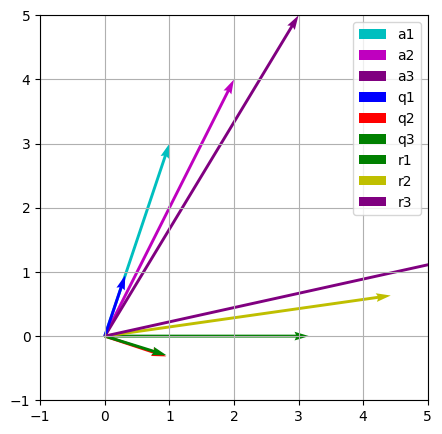

In [18]:
mat = [[1, 2, 3], [3, 4, 5]]

Q, R = qr_decompose(mat)
print(Q)
print(R)

plt.figure(figsize=(5, 5))
# plot mat
plt.quiver(
    0,
    0,
    mat[0][0],
    mat[1][0],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="c",
    label="a1",
)
plt.quiver(
    0,
    0,
    mat[0][1],
    mat[1][1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="m",
    label="a2",
)
plt.quiver(
    0,
    0,
    mat[0][2],
    mat[1][2],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="purple",
    label="a3",
)

# Plot the Q vectors
plt.quiver(
    0,
    0,
    Q[0][0],
    Q[1][0],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="b",
    label="q1",
)
plt.quiver(
    0,
    0,
    Q[0][1],
    Q[1][1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="r",
    label="q2",
)
plt.quiver(
    0,
    0,
    Q[0][2],
    Q[1][2],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="g",
    label="q3",
)
# Plot the R vectors
plt.quiver(
    0,
    0,
    R[0][0],
    R[1][0],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="g",
    label="r1",
)
plt.quiver(
    0,
    0,
    R[0][1],
    R[1][1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="y",
    label="r2",
)
plt.quiver(
    0,
    0,
    R[0][2],
    R[1][2],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="purple",
    label="r3",
)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.legend()
plt.show()

In [21]:
def cosine_distance(u: list[float], v: list[float]):
    return 1 - sum(u[i] * v[i] for i in range(len(u))) / (
        math.sqrt(sum(u[i] * u[i] for i in range(len(u))))
        * math.sqrt(sum(v[i] * v[i] for i in range(len(v))))
    )


print(cosine_distance([1, 2, 3], [4, 5, 6]))
print(cosine_distance([1, 2, 3], [1, 2, 3]))

0.025368153802923787
0.0


In [26]:
Q, R = qr_decompose(
    [
        get_embedding("I am Happy!"),
        get_embedding("Happy"),
    ],
)

P = multiply(Q, transpose(Q))

TypeError: can't multiply sequence by non-int of type 'list'

In [38]:
P = multiply([[1, 2, 3], [4, 5, 6]], transpose([[1, 2, 3], [4, 5, 6]]))

[[14, 32], [32, 77]]